<h1> TeleCo Customers Data Exploration</h1>

<h2> Imporing data and packages </h2>

Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Suppressing warning messages

In [2]:
warnings.filterwarnings('ignore')

Setting file paths

In [3]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","teleco_clean_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

Importing data cleaning and summarizing scripts

In [4]:
from data_cleaning_functions import DataCleaner as Cleaner 
from data_summarizing_functions import DataSummarizer as Sumar

cleaner = Cleaner()
sumar = Sumar()

Loading the data

In [5]:
clean_df = pd.read_csv(data_path)

<h2>Univariate Analysis</h2>

**SQL query based functions to explore handsets and their manufacturers**

What are the top 10 handsets used by customers?

In [6]:
handsets_df = sumar.get_top_n("clean_df", "Handset Type", 10, globals())
handsets_df

,Handset Type,user_count
0,Huawei B528S-23A,20324
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,Apple iPhone 7 (A1778),6326
4,Apple iPhone Se (A1723),5187
5,Apple iPhone 8 (A1905),4993
6,Apple iPhone Xr (A2105),4568
7,Samsung Galaxy S8 (Sm-G950F),4520
8,Apple iPhone X (A1901),3813
9,Samsung Galaxy A5 Sm-A520F,3724


What are the top 3 handset manufacturers?

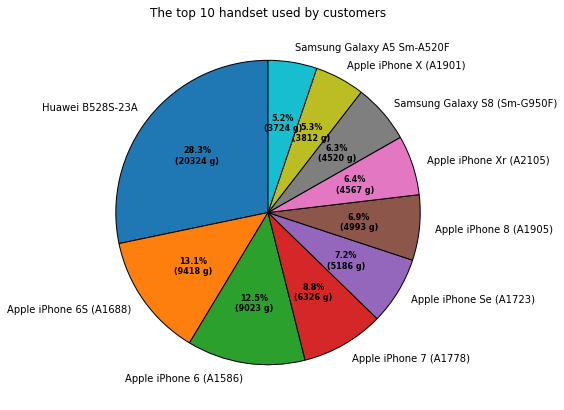

In [7]:
sumar.plot_pie(handsets_df, ['Handset Type','user_count'], "The top 10 handset used by customers")

In [8]:
top_man = sumar.get_top_n("clean_df", "Handset Manufacturer", 3, globals())
top_man

,Handset Manufacturer,user_count
0,Apple,60137
1,Samsung,40839
2,Huawei,34423


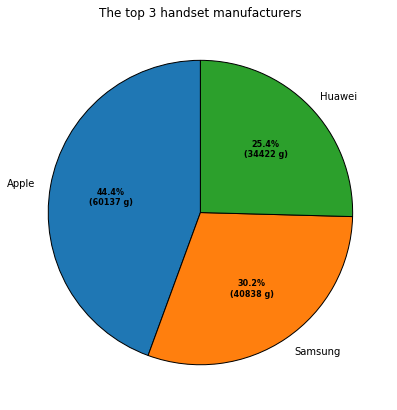

In [9]:
sumar.plot_pie(top_man, ['Handset Manufacturer','user_count'], "The top 3 handset manufacturers")

What are the top 5 Handsets per the top 3 handset manufacturers

In [10]:
sumar.manByHandset(top_man["Handset Manufacturer"].to_list(),'clean_df', globals())

  Handset Manufacturer             Handset Type  num_users
0                Apple  Apple iPhone 6S (A1688)       9419
1                Apple   Apple iPhone 6 (A1586)       9023
2                Apple   Apple iPhone 7 (A1778)       6326
3                Apple  Apple iPhone Se (A1723)       5187
4                Apple   Apple iPhone 8 (A1905)       4993 

  Handset Manufacturer                  Handset Type  num_users
0              Samsung  Samsung Galaxy S8 (Sm-G950F)       4520
1              Samsung    Samsung Galaxy A5 Sm-A520F       3724
2              Samsung   Samsung Galaxy J5 (Sm-J530)       3696
3              Samsung   Samsung Galaxy J3 (Sm-J330)       3484
4              Samsung  Samsung Galaxy S7 (Sm-G930X)       3199 

  Handset Manufacturer                    Handset Type  num_users
0               Huawei                Huawei B528S-23A      19752
1               Huawei                    Huawei E5180       2079
2               Huawei  Huawei P20 Lite Huawei Nova 3E      

**Observation**
<ul>
<li> The most used handset type is Huawei B528S-23A </li>
<li> But most of the handsets used are manufactured by Apple </li>
<li> From among the top three manufacturers, Apple iPhone 6S, Samsung Galaxy S8 (Sm-G950F), and Huawei B528S-23A are 
the most used handsets</li>

</ul>

<h3> Aggregating the data for further exploration </h3>

In [11]:
grouping_lis = ["MSISDN/Number"]
aggr_lis = ["Bearer Id","Dur. (S)", "Handset Type", "Avg RTT DL (S)", 
            "Avg RTT UL (S)", "Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)", 
            "TCP DL Retrans. Vol (MB)", "TCP UL Retrans. Vol (MB)","Total DL (MB)",
            "Total UL (MB)", "Social Media DL (MB)", "Social Media UL (MB)",
            "Youtube DL (MB)", "Youtube UL (MB)", "Netflix DL (MB)", "Netflix UL (MB)",
            "Google DL (MB)", "Google UL (MB)","Gaming DL (MB)","Gaming UL (MB)", 
            "Email DL (MB)", "Email UL (MB)", "Other DL (MB)", "Other UL (MB)"] 

metric_lis = ["count", "sum", pd.Series.mode, "sum","sum", "sum", "sum", "sum", "sum",
              "sum", "sum", "sum", "sum", "sum","sum", "sum","sum", "sum","sum", "sum",
              "sum","sum", "sum", "sum", "sum"]

col_names = ["xDr_session_count", "session_dur", "Handset", "RTT DL (S)", "RTT UL (S)", 
             "TP DL (kbps)", "TP UL (kbps)", "TCP DL Retrans (MB)", 
             "TCP UL Retrans (MB)","Total_DL", "Total_UL",
             "Social_DL", "Social_UL","Youtube_DL", "Youtube_UL", "Netflix_DL",
             "Netflix_UL", "Google_DL", "Google_UL", "Gaming_DL", "Gaming_UL", 
             "Email_DL", "Email_UL", "Other_DL", "Other_UL"]


aggr_df = sumar.find_agg(clean_df, grouping_lis, aggr_lis, metric_lis, col_names)
             
def extractHand(element):
    if type(element) is np.ndarray:
        return str(element[0])
    else:
        return element

aggr_df['Handset'] = aggr_df.apply(lambda row : extractHand(row["Handset"]), axis = 1)

sumar.combineColumns(aggr_df, "Total_DL", "Total_UL", "total_vol")
sumar.combineColumns(aggr_df, "RTT DL (S)", "RTT UL (S)", "RTT total", True)
sumar.combineColumns(aggr_df, "TP DL (kbps)", "TP UL (kbps)", "TP total", True)
sumar.combineColumns(aggr_df, "TCP DL Retrans (MB)", "TCP UL Retrans (MB)", "TCP total", True)
sumar.combineColumns(aggr_df, "Youtube_DL", "Youtube_UL", "youtube", True)
sumar.combineColumns(aggr_df, "Netflix_DL", "Netflix_UL", "netflix", True)
sumar.combineColumns(aggr_df, "Google_DL", "Google_UL", "google", True)
sumar.combineColumns(aggr_df, "Gaming_DL", "Gaming_UL", "gaming", True)
sumar.combineColumns(aggr_df, "Email_DL", "Email_UL", "email", True)
sumar.combineColumns(aggr_df, "Social_DL", "Social_UL", "social", True)
sumar.combineColumns(aggr_df, "Other_DL", "Other_UL", "other", True)

In [12]:
aggr_df.head()

,MSISDN/Number,xDr_session_count,session_dur,Handset,Total_DL,Total_UL,total_vol,RTT total,TP total,TCP total,youtube,netflix,google,gaming,email,social,other
0,3.360100e+10,1,116.720,Huawei P20 Lite Huawei Nova 3E,842.637466,36.053108,878.690574,0.046,76.0,0.040345,21.624548,27.180981,4.389005,812.458661,1.331362,2.232135,386.570872
1,3.360100e+10,1,181.230,Apple iPhone 7 (A1778),120.755184,36.104459,156.859643,0.031,99.0,0.040345,12.432223,11.221763,5.334863,119.750078,3.307781,2.660565,281.710071
2,3.360100e+10,1,134.969,undefined,556.659663,39.306820,595.966483,0.050,97.0,0.040345,21.333570,19.353900,3.443126,538.827713,3.205380,3.195623,501.693672
3,3.360101e+10,1,49.878,Apple iPhone 5S (A1457),401.993172,20.327526,422.320698,0.084,248.0,0.005760,6.977321,1.942092,9.678493,391.126127,2.284670,0.280294,35.279702
4,3.360101e+10,2,37.104,Apple iPhone Se (A1723),1363.130417,94.280527,1457.410944,0.119,40489.0,0.080691,41.533002,49.201724,18.499616,1314.797820,3.305469,2.912542,804.804484


In [13]:
sumar.summ_columns(aggr_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,float64,106856
1,xDr_session_count,0,0.0,int64,18
2,session_dur,0,0.0,float64,74939
3,Handset,0,0.0,object,1394
4,Total_DL,0,0.0,float64,106852
5,Total_UL,0,0.0,float64,106717
6,total_vol,0,0.0,float64,106853
7,RTT total,0,0.0,float64,1046
8,TP total,0,0.0,float64,28856
9,TCP total,0,0.0,float64,30153


Basic summary of the aggregated dataframe.

In [14]:
aggr_df.describe()

,MSISDN/Number,xDr_session_count,session_dur,Total_DL,Total_UL,total_vol,RTT total,TP total,TCP total,youtube,netflix,google,gaming,email,social,other
count,1.068560e+05,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,4.511474e+10,1.389777,128.518045,633.652681,57.270714,690.923395,0.070369,9865.619656,0.078050,31.558399,31.538332,10.882434,599.769011,3.148796,2.547967,598.508764
std,2.889423e+12,0.809863,101.406963,464.555056,35.618931,491.035303,0.052233,20023.440180,0.104301,21.294918,21.289557,7.544861,449.150462,2.222400,1.908038,448.922110
min,3.360100e+10,0.000000,7.142000,8.827082,2.866892,33.249009,0.000000,0.000000,0.000097,0.078903,0.184569,0.040330,0.306358,0.018176,0.001563,0.149045
25%,3.365088e+10,1.000000,71.308000,314.827064,36.395475,358.531257,0.045000,97.000000,0.040345,18.631089,18.555973,5.942636,288.063112,1.674481,1.211281,285.559911
50%,3.366365e+10,1.000000,97.154000,570.367723,46.768909,617.911343,0.050000,204.000000,0.040345,26.800376,26.718889,9.586153,542.349207,2.799824,2.303756,539.832343
75%,3.368344e+10,2.000000,169.543000,807.364490,65.616360,857.377889,0.082000,11484.000000,0.080691,37.927976,37.976957,13.214740,777.304138,3.847198,3.307509,775.397531
max,8.823971e+14,18.000000,1905.478000,8156.743493,729.577380,8846.226494,0.991000,270523.000000,2.537905,452.958769,399.519079,152.191852,7749.432234,42.418782,43.374779,8167.877776


<AxesSubplot:>

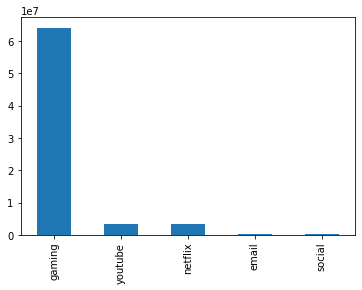

In [15]:
aggr_df[['youtube','gaming','email','netflix','social']].sum().sort_values(ascending = False).plot(kind='bar')

Comparing the two applications with the smallest data volume share

<AxesSubplot:>

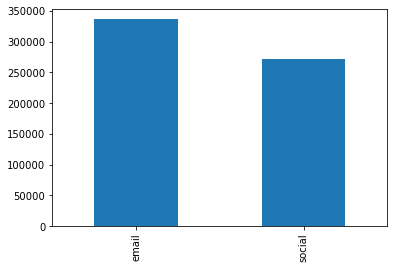

In [16]:
aggr_df[['email','social']].sum().plot(kind='bar')

<AxesSubplot:>

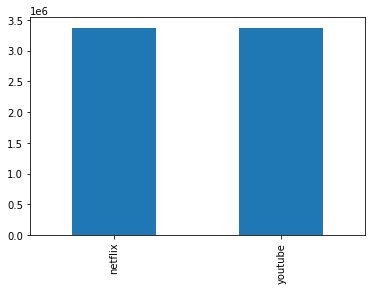

In [17]:
aggr_df[['netflix','youtube']].sum().plot(kind='bar')

**Observation**
<ul>
    <li>The number of xDr sessions per user doesn’t vary significantly 75% of the users have xDr session count is equal to 1. The distribution for this feature is right skewed because the mean is greater than the median. The maximum xDr session count per user is 7.
    </li>
    <li>The total session durations per  user vary between 2 hours to more than 3 and a half days. And the majority of the sessions are below 2 days. The distribution for this variable is right skewed as well with an average value of a day and a half.</li>
    <li>
Regarding data volume, the majority of the users (75%) used below 900MB of data in the entire month. The maximum data volume is 4GB. The average data usage per user is 625MB.
    </li>
    <li>
        The largest contributor to the total data usage is gaming. For the 75% of the users 742 MB of data (90% of their total data usage in the month) comes from gaming.</li>
    <li>
Youtube and netflix applications used almost equal volume of data.
    </li>
    <li>
social media applications used the least amount of data in the month compared to the other applications. 
    </li>
    <li>
        The average data usage per user in the month was just 2.6 MB.
    </li>
    <li>
Customers data volume primarily comes from downloading than uploading as shown in the table. The average download size is 572 MB, while the average upload is 52 MB.

    
    
    

</ul>

Text(0.5, 1.0, 'Distribution of session duration ')

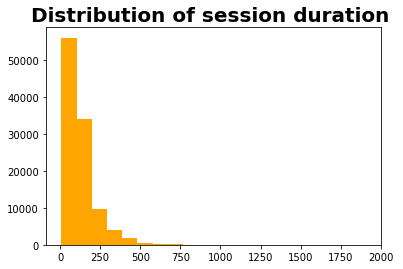

In [18]:
plt.hist(aggr_df['session_dur'],bins=20, color='orange')
plt.title(f'Distribution of session duration ', size=20, fontweight='bold')
           

<Figure size 576x288 with 0 Axes>

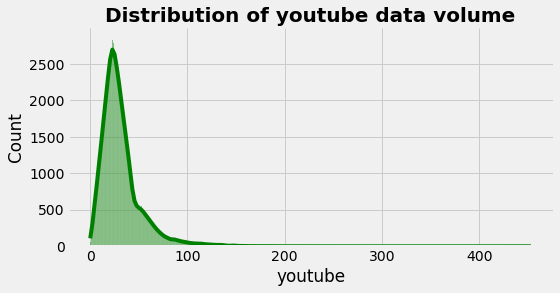

<Figure size 576x288 with 0 Axes>

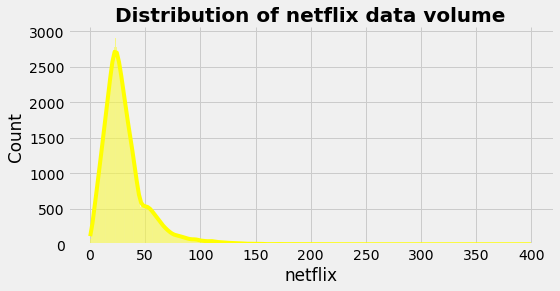

<Figure size 576x288 with 0 Axes>

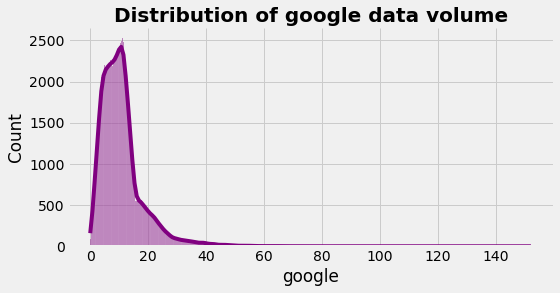

<Figure size 576x288 with 0 Axes>

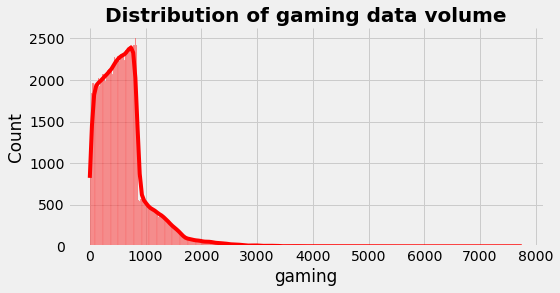

<Figure size 576x288 with 0 Axes>

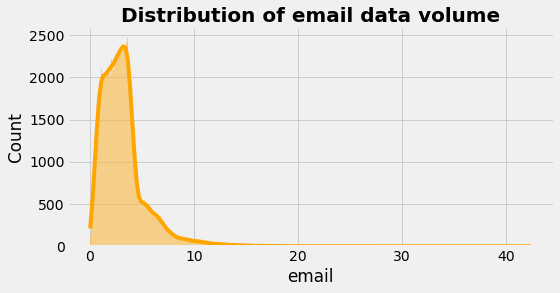

<Figure size 576x288 with 0 Axes>

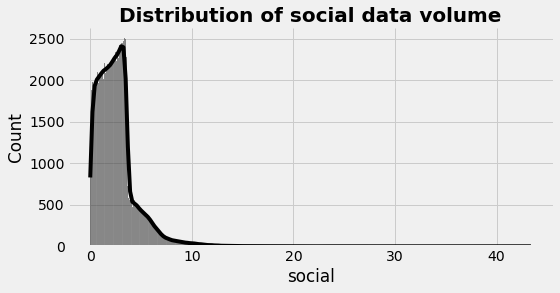

In [19]:
sumar.showDistribution(aggr_df, ['youtube', 'netflix', 'google', 'gaming', 'email', 'social'], ['green','yellow','purple','red','orange','black'])

**Observation**
<ul>
    <li>Youtube data volume has a right skewed distribution. With mean of 28.5MB and median of 25.7MB </li>
    <li>Google data volume has a normal looking distribution. With mean of 9.8 and median of 9.1MB </li>
    <li>gaming data volume has a slightly right skewed distribution. With mean of 542MB and median of 516MB </li>
    <li>email data volume has a normal looking distribution. With mean of 2.8MB and median of 2.6MB </li>
    <li>social data volume has a slightly right skewed distribution. With mean of 2.3MB and median of 2.1MB  </li>
    <li>netflix data volume has a slightly right skewed distribution. With mean of 28.5MB and median of 25.7MB 



    
    
    

</ul>

<h2> Bivariate Analysis</h2>

plotting scatter plots and creating correlation matrixes to see relationships between variables.

           total_vol    gaming
total_vol   1.000000  0.997003
gaming      0.997003  1.000000
           total_vol   netflix
total_vol   1.000000  0.705012
netflix     0.705012  1.000000
           total_vol   youtube
total_vol   1.000000  0.705033
youtube     0.705033  1.000000
           total_vol    social
total_vol   1.000000  0.623954
social      0.623954  1.000000
           total_vol     email
total_vol   1.000000  0.663771
email       0.663771  1.000000
           total_vol    google
total_vol   1.000000  0.681724
google      0.681724  1.000000


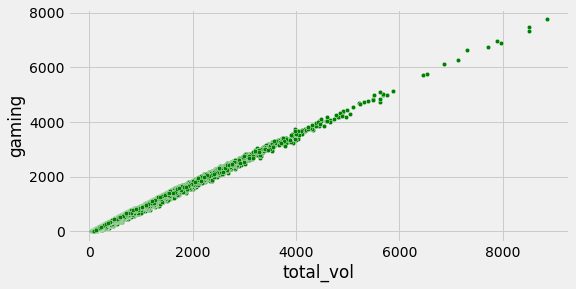

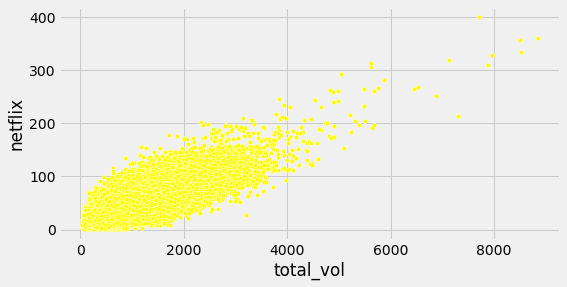

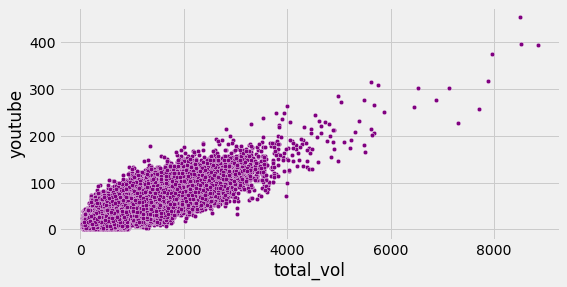

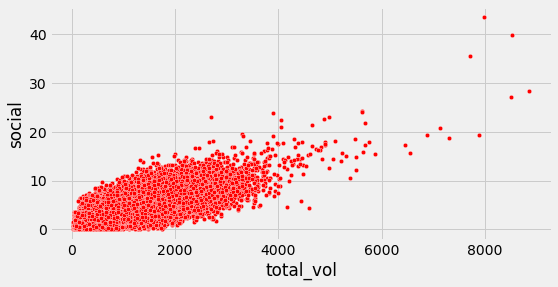

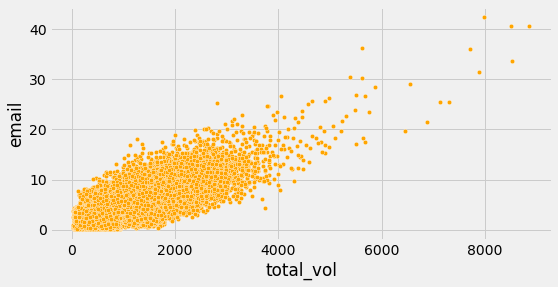

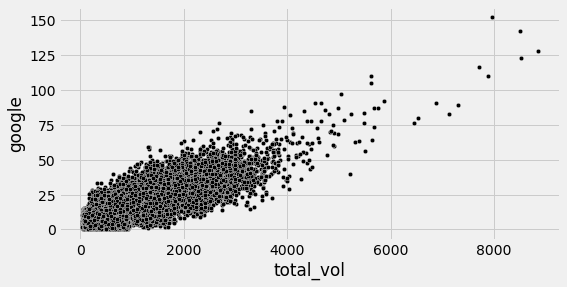

In [20]:
sumar.bivariateAnalysis(aggr_df, [['total_vol','gaming'],['total_vol','netflix'],['total_vol','youtube'],['total_vol','social'],['total_vol','email'],['total_vol','google']],['green','yellow','purple','red','orange','black'])

**Observation**
<ul>
    <li>Gaming and total data volume have the highest positive correlation (0.996). Which supports the idea that data from gaming is the primary determiner of the total data volume. All the other applications have a positive correlation as well, but the correlation coefficients are below 0.55.


    
    
    

</ul>

In [21]:

decile_df = sumar.topDecile(aggr_df, ['Decile'],"session_dur", ['session_dur','total_vol'], ['sum','sum'], ['duration','data_vol'], [5,9])
decile_df

,Decile,duration,data_vol
5,5,1168315.108,6.402314e+06
6,6,1485254.003,6.114339e+06
7,7,1790772.806,7.512323e+06
8,8,2193781.210,8.524538e+06
9,9,3813073.235,1.622343e+07


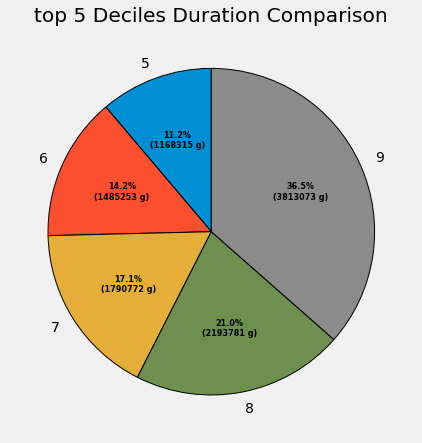

In [22]:
sumar.plot_pie(decile_df, ['Decile','duration'], "top 5 Deciles Duration Comparison")

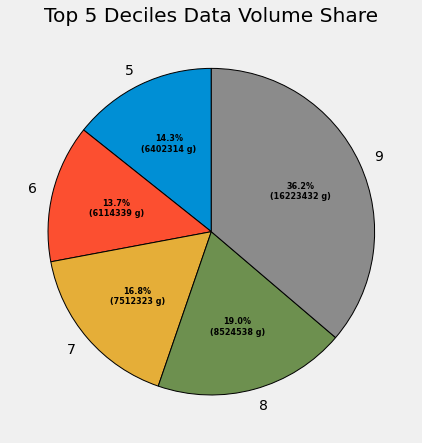

In [23]:
sumar.plot_pie(decile_df, ['Decile','data_vol'], "Top 5 Deciles Data Volume Share")

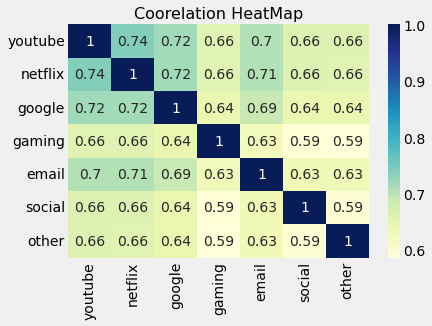

In [24]:
test_list = ['youtube', 'netflix', 'google', 'gaming', 'email', 'social', 'other']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 4)) 
dataplot = sns.heatmap(sumar.corrMatrix(aggr_df, test_list),
                       cmap="YlGnBu", annot=True)
dataplot.set_title('Coorelation HeatMap',fontsize=16)  
# displaying heatmap
plt.show()

**Observations**
<ul>
    <li> Youtube and Netflix have the highest correlation: 0.57</li>
    <li> Google have the same correlation with netflix and youtube: 0.54</li>
</ul>

In [25]:
save_data_path = os.path.join(parent_dir,"data","teleco_user-aggr_data.csv") # setting path to data directory
aggr_df.to_csv(save_data_path, index=False)